# Improving Your Model | Feature Engineering

*CS 334 - Algorithms of Machine Learning | Conrad Kennington*

*Computer Science | Boise State University*

*10.03.2022 | Fall 2022*

*Aida Gomezbueno Berezo | aidagomezbuenobe@u.boisestate.edu*

In [1095]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

*Some features that did not help in making a prediction based on my reasoning or my own knowledge about factors that might have some effect on the Boise rainfall prediction and I have **removed** are: 'Stations', 'Name', 'Datetime', 'PrecipProb', 'Dew', 'Description', 'TempMax', 'TempMin', 'Feelslikemax', 'Feelslikemin', 'SevereRisk', 'WindGust', as well as **formatting** some of the features and **replacing** others looking for a more restrictive and efficient classification.* 

*Later, as I played with the fields and considered them interesting, I kept eliminating those that did not offer me useful information: such as Sunrise and Sunset. Others, such as Datetime, before eliminating it, I **extracted** it in another column in order to record only the month of the year in which those characteristics occurred (the dataset date of 1 full year: from August 1, 2021 to August 1, 2022).*

In [1097]:
data = pd.read_csv(r'boise-weather-forecast-dataset.csv')
df = pd.DataFrame(data, columns=['name','datetime','tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','precip','precipprob','precipcover','preciptype','snow','snowdepth','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','severerisk','sunrise','sunset','moonphase','conditions','description','icon','stations', 'label'])
df.columns=['Name', 'Datetime', 'TempMax', 'TempMin', 'Temp', 'Feelslikemax', 'Feelslikemin' , 'Feelslike' , 'Dew' , 'Humidity' , 'Precip' , 'PrecipProb', 'PrecipCover', 'PrecipType', 'Snow' , 'SnowDepth', 'WindGust', 'WindSpeed' , 'WindDir', 'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation', 'SolarEnergy', 'UVIndex', 'SevereRisk', 'Sunrise', 'Sunset' , 'MoonPhase', 'Conditions', 'Description', 'Icon', 'Stations', 'Label']
df["Label"] = np.where(df["Precip"]>0, 1, 0)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Sunrise'] = pd.to_datetime(df['Sunrise'])
df['Sunset'] = pd.to_datetime(df['Sunset'])
df['Month']=pd.DatetimeIndex(df['Datetime']).month
df = df.drop(['Stations', 'Name', 'Datetime', 'PrecipProb', 'Dew', 'Description', 'TempMax', 'TempMin', 'Feelslikemax', 'Feelslikemin', 'SevereRisk', 'WindGust'], axis = 1)
df["PrecipType"] = np.where(df["PrecipType"].isna(), "no rain", df["PrecipType"])
df["PrecipType"] = np.where(df["PrecipType"]=="rain", "1", 0)
df["Precip"] = np.where(df["Precip"]>0, "1", 0)
df["Conditions"] = df["Conditions"].replace("Clear", "No rain")
df["Conditions"] = df["Conditions"].replace("Snow, Rain, Freezing Drizzle/Freezing Rain, Overcast", "Rain")
df["Conditions"] = df["Conditions"].replace("Snow, Rain, Freezing Drizzle/Freezing Rain, Partially cloudy", "Rain")
df["Conditions"] = df["Conditions"].replace("Rain, Partially cloudy", "Rain")
df["Conditions"] = df["Conditions"].replace("Partially cloudy", "No rain")
df["Conditions"] = df["Conditions"].replace("Overcast", "No rain")
df["Conditions"] = df["Conditions"].replace("Snow, Rain, Partially cloudy", "Rain")
df["Conditions"] = df["Conditions"].replace("Snow, Rain, Overcast", "Rain")
df["Conditions"] = df["Conditions"].replace("Snow, Partially cloudy", "Rain")
df["Conditions"] = df["Conditions"].replace("Snow, Rain", "Rain")
df["Conditions"] = df["Conditions"].replace("Rain, Overcast", "Rain")
df["Conditions"] = np.where(df["Conditions"]=="Rain", "1", 0)
df["Icon"] = df["Icon"].replace("rain", "Rain")
df["Icon"] = df["Icon"].replace("snow", "Rain")
df["Icon"] = df["Icon"].replace("clear-day", "No rain")
df["Icon"] = df["Icon"].replace("partly-cloudy-day", "No rain")
df["Icon"] = df["Icon"].replace("cloudy", "No rain")
df["Icon"] = df["Icon"].replace("cloudy", "No rain")
df["Icon"] = np.where(df["Icon"]=="Rain", "1", 0)
df["Month"] = df["Month"].astype(int)
df["Precip"] = df["Precip"].astype(float)
df["PrecipType"] = df["PrecipType"].astype(float)
df["Conditions"] = df["Conditions"].astype(float)
df["Icon"] = df["Icon"].astype(float)
df["UVIndex"] = df["UVIndex"].astype(float)
df["Label"] = df["Label"].astype(float)
df["Month"] = df["Month"].astype(float)
df

,Temp,Feelslike,Humidity,Precip,PrecipCover,PrecipType,Snow,SnowDepth,WindSpeed,WindDir,...,SolarRadiation,SolarEnergy,UVIndex,Sunrise,Sunset,MoonPhase,Conditions,Icon,Label,Month
0,23.3,23.5,77.7,1.0,41.67,1.0,0.0,0.0,16.4,114.9,...,137.9,11.9,8.0,2021-08-01 06:34:26,2021-08-01 21:07:05,0.80,1.0,1.0,1.0,8.0
1,26.6,26.3,58.7,0.0,0.00,0.0,0.0,0.0,27.6,158.1,...,301.7,26.0,9.0,2021-08-02 06:35:30,2021-08-02 21:05:52,0.84,0.0,0.0,0.0,8.0
2,27.7,27.1,43.1,1.0,4.17,1.0,0.0,0.0,25.8,124.0,...,270.7,23.4,9.0,2021-08-03 06:36:35,2021-08-03 21:04:36,0.89,1.0,1.0,1.0,8.0
3,29.7,28.6,30.8,0.0,0.00,0.0,0.0,0.0,22.1,148.1,...,280.2,24.1,9.0,2021-08-04 06:37:40,2021-08-04 21:03:19,0.93,0.0,0.0,0.0,8.0
4,29.4,28.3,29.3,0.0,0.00,0.0,0.0,0.0,28.9,222.5,...,233.8,20.3,9.0,2021-08-05 06:38:46,2021-08-05 21:02:01,0.96,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,31.1,29.8,27.5,0.0,0.00,0.0,0.0,0.0,29.1,265.7,...,338.9,29.4,10.0,2022-07-28 06:29:58,2022-07-28 21:12:02,1.00,0.0,0.0,0.0,7.0
362,31.2,29.7,24.0,0.0,0.00,0.0,0.0,0.0,25.9,204.1,...,339.9,29.2,10.0,2022-07-29 06:31:01,2022-07-29 21:10:55,0.00,0.0,0.0,0.0,7.0
363,31.4,29.8,21.2,0.0,0.00,0.0,0.0,0.0,26.3,174.2,...,374.5,32.2,10.0,2022-07-30 06:32:04,2022-07-30 21:09:46,0.01,0.0,0.0,0.0,7.0
364,32.2,30.5,17.8,0.0,0.00,0.0,0.0,0.0,20.3,185.5,...,321.8,27.8,9.0,2022-07-31 06:33:07,2022-07-31 21:08:36,0.04,0.0,0.0,0.0,7.0


*Considering raining and snow as snow, as snow is a kind of precipitation as rain.*

*Starting training models. Each one with several features to try to get the model to conclude not only based on a single sample. Also **different labels** are given.*

###### Label as the label

In [1033]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Label
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, Y_pred)*100))

Accuracy: 96.36%


In [1034]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'CloudCover', 'UVIndex', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Label
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, Y_pred)*100))

Accuracy: 100.00%


*As I restricted the features I trained the model with, the accuracy increased, as can be seen just above. By removing or dispensing with fields such as 'Moonphase', which contributed nothing to the prediction (rather, they contaminated it), the prediction became more reliable.*

[]

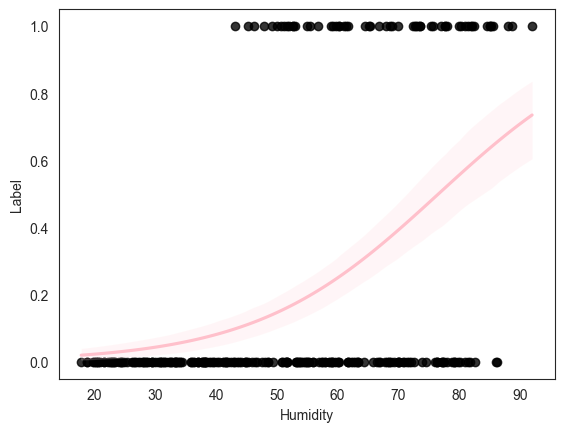

In [1035]:
sns.regplot(x=X_train.Humidity, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

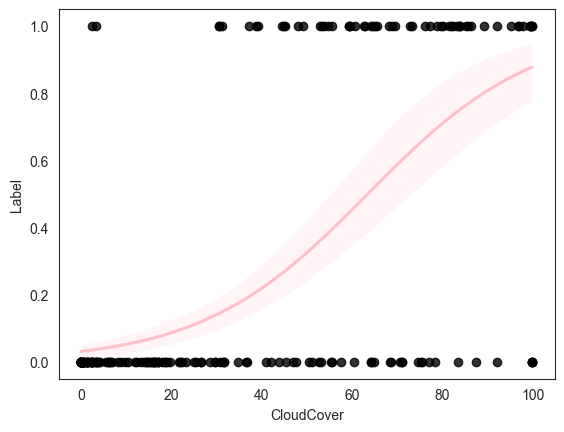

In [1037]:
sns.regplot(x=X_train.CloudCover, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

*The two features that I have found most relevant or that offer the greatest accuracy or the simplest and most obvious visual representation are 'Humidity' and 'CloudCover'. Similarly, 'Humidity' is the feature on which I also based the training of the model (only one feature) in contrast to the Label.*

*In addition, I have also trained the model taking into account each time different labels: **'Label'**, **'Conditions'** and **'Icons'**. Labels that were subtracted at the beginning of the data processing.*

*In the different uses of the case below, I have chosen to provide the model with different subsets of data from the same dataframe, and I can conclude that the more restricted the input set is, the higher the level of accuracy achieved in the prediction.*

###### Precip as the Label

In [1038]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Precip
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, Y_pred)*100))

Accuracy: 96.36%


In [1039]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'CloudCover', 'UVIndex', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Precip
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, Y_pred)*100))

Accuracy: 100.00%


[]

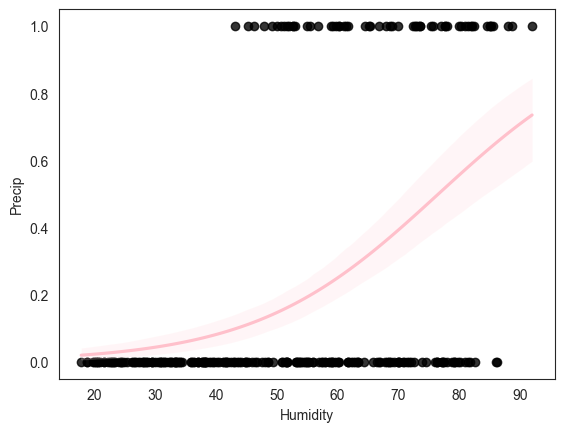

In [1040]:
sns.regplot(x=X_train.Humidity, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

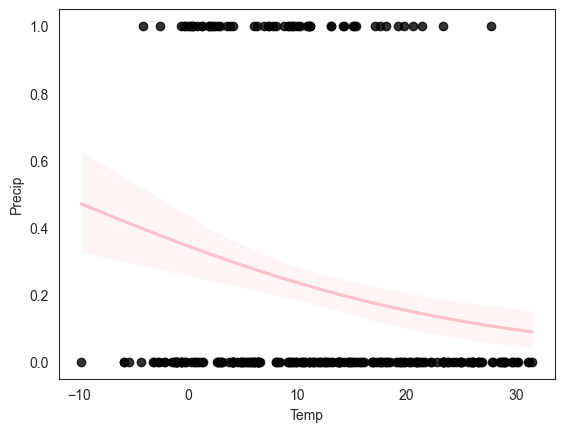

In [1041]:
sns.regplot(x=X_train.Temp, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

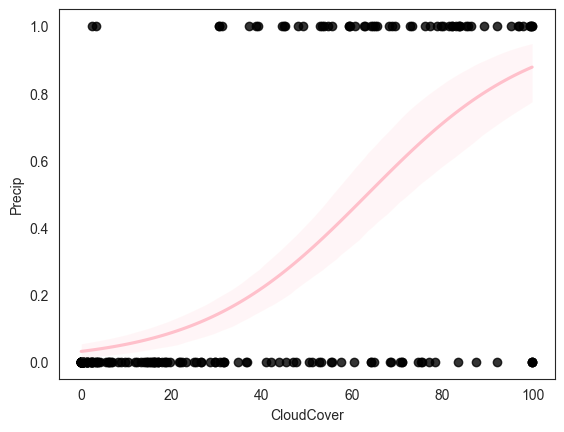

In [1042]:
sns.regplot(x=X_train.CloudCover, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

*In addition to the most representative features, I have chosen to use other example variables to represent the model and provide an overall view of the relationship of the different variables with respect to the final prediction or expected output.*

[]

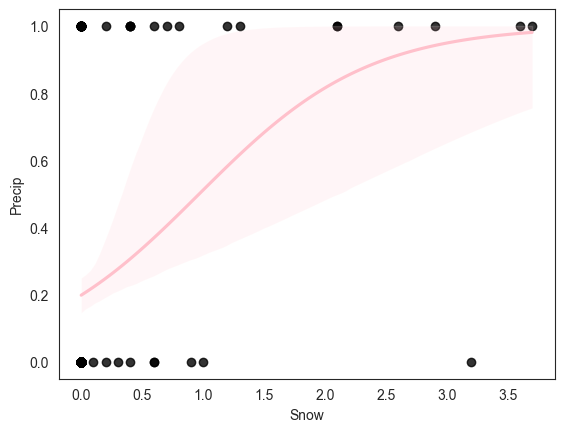

In [1043]:
sns.regplot(x=X_train.Snow, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

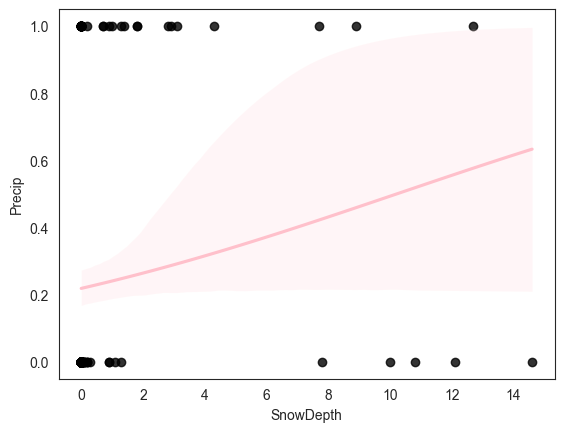

In [1044]:
sns.regplot(x=X_train.SnowDepth, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

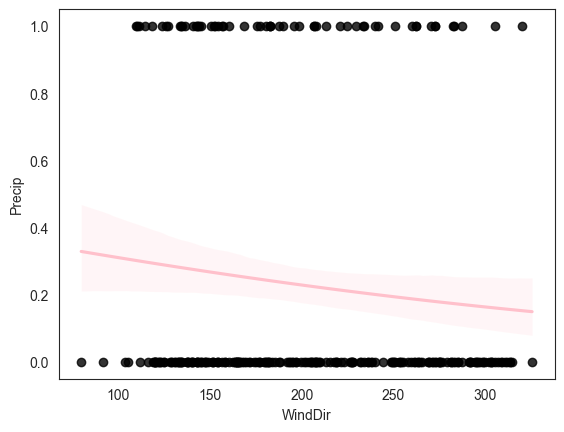

In [1045]:
sns.regplot(x=X_train.WindDir, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

###### Conditions as the Label

In [1046]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'CloudCover', 'UVIndex', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Conditions
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, Y_pred)*100))

Accuracy: 100.00%


In [1047]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Conditions
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, Y_pred)*100))

Accuracy: 96.36%


[]

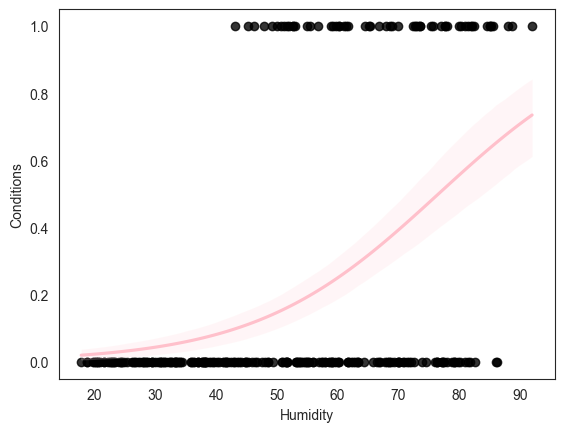

In [1048]:
sns.regplot(x=X_train.Humidity, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

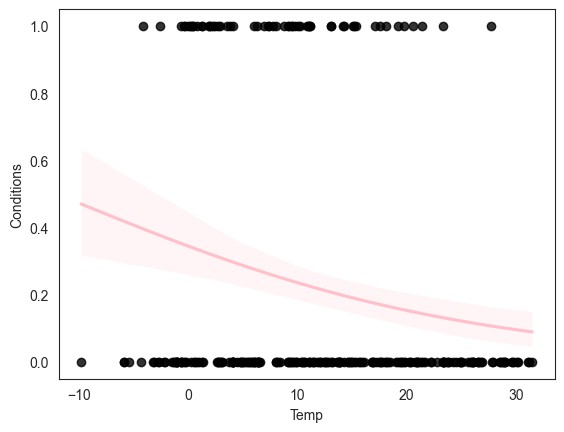

In [1049]:
sns.regplot(x=X_train.Temp, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

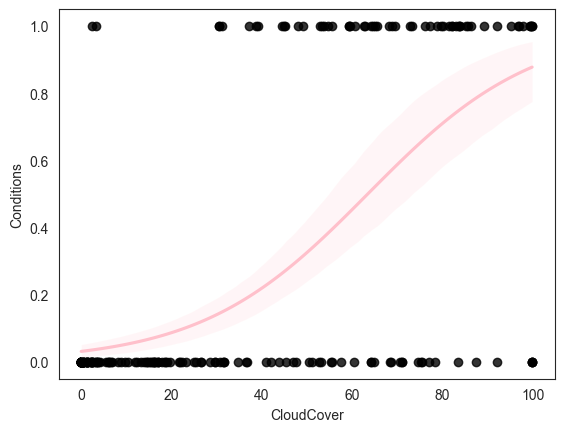

In [1050]:
sns.regplot(x=X_train.CloudCover, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

###### Icon as the Label

In [1051]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Icon
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9818181818181818


In [1052]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'CloudCover', 'UVIndex', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Icon
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.990909090909091


[]

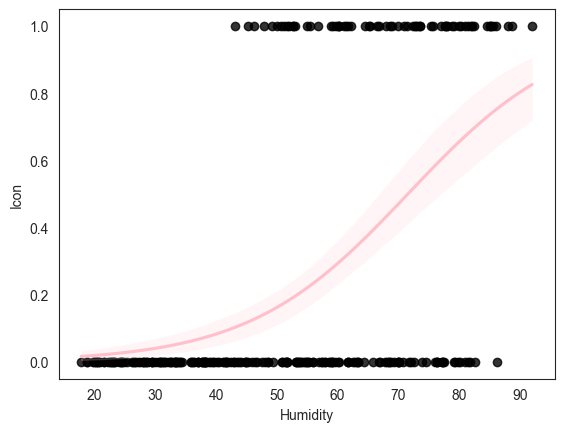

In [1053]:
sns.regplot(x=X_train.Humidity, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

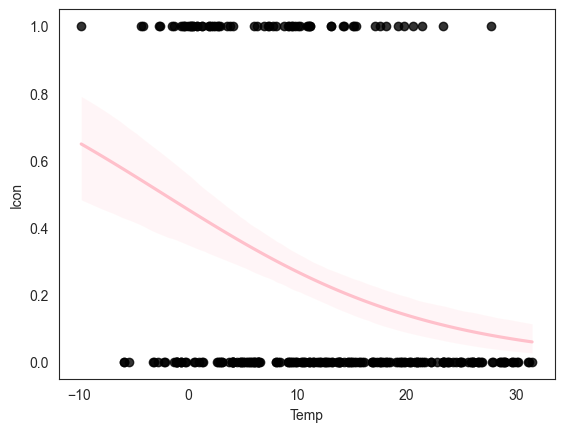

In [1054]:
sns.regplot(x=X_train.Temp, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

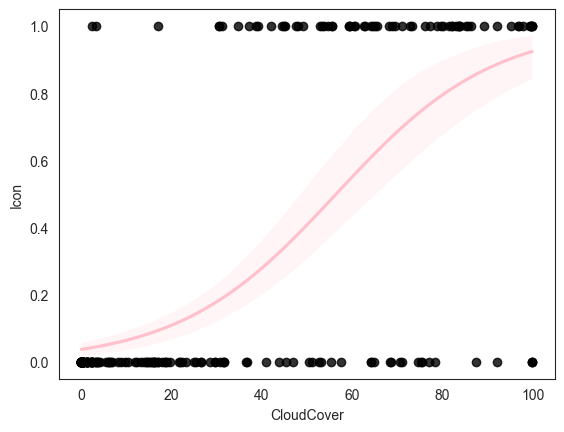

In [1055]:
sns.regplot(x=X_train.CloudCover, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

*Training the model just with **one feature**. Model that I also trained in the previous homework and that resulted in an accuracy lower than 100% and for which I have chosen to take as an example and try to increase it by at least 5%.*



###### Label as the Label

In [1056]:
X2 = df.Humidity.values.reshape(-1,1)
Y = df.Label
X_train_H,X_test_H,Y_train_H,Y_test_H=train_test_split(X2, Y, test_size=0.3, random_state=25)
logreg_h = LogisticRegression(max_iter=5000, C=1e9)
logreg_h.fit(X_train_H,Y_train_H)
Y_pred_H = logreg_h.predict(X_test_H)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test_H, Y_pred_H)*100))

Accuracy: 74.55%


##### Precip as the Label

In [1057]:
X2 = df.Humidity.values.reshape(-1,1)
Y = df.Precip
X_train_H,X_test_H,Y_train_H,Y_test_H=train_test_split(X2, Y, test_size=0.3, random_state=25)
logreg_h = LogisticRegression(max_iter=5000, C=1e9)
logreg_h.fit(X_train_H,Y_train_H)
Y_pred_H = logreg_h.predict(X_test_H)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test_H, Y_pred_H)*100))

Accuracy: 74.55%


##### Icon as the Label

In [1058]:
X2 = df.Humidity.values.reshape(-1,1)
Y = df.Icon
X_train_H,X_test_H,Y_train_H,Y_test_H=train_test_split(X2, Y, test_size=0.3, random_state=25)
logreg_h = LogisticRegression(max_iter=5000, C=1e9)
logreg_h.fit(X_train_H,Y_train_H)
Y_pred_H = logreg_h.predict(X_test_H)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test_H, Y_pred_H)*100))

Accuracy: 73.64%


##### Conditions as the Label

In [1059]:
X2 = df.Humidity.values.reshape(-1,1)
Y = df.Conditions
X_train_H,X_test_H,Y_train_H,Y_test_H=train_test_split(X2, Y, test_size=0.3, random_state=25)
logreg_h = LogisticRegression(max_iter=5000, C=1e9)
logreg_h.fit(X_train_H,Y_train_H)
Y_pred_H = logreg_h.predict(X_test_H)
print("Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test_H, Y_pred_H)*100))

Accuracy: 74.55%


[]

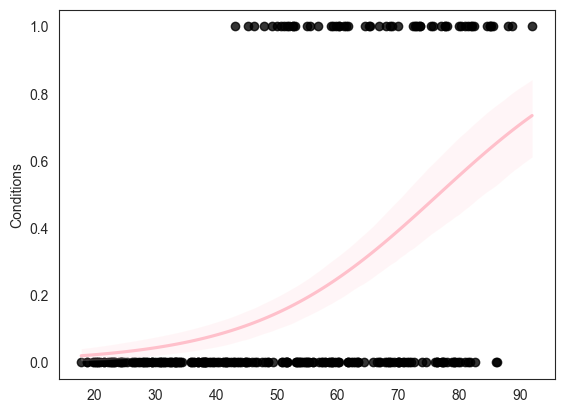

In [1060]:
sns.regplot(x=X_train_H, y=Y_train_H, data=X_train_H, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

## Model Evaluation Metrics

###### Cross Validation

In [1061]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover',
       'CloudCover','UVIndex', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Label
X2 = df.Humidity.values.reshape(-1,1)

In [1062]:
X_train_hv, X_test_hv, Y_train_hv, Y_test_hv = model_selection.train_test_split(X2, Y, test_size=0.30, random_state=100)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_hv, Y_train_hv)
result = model.score(X_test_hv, Y_test_hv)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 72.73%


In [1063]:
#K-folds Validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X2, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 75.19%


In [1064]:
#Stratified K-fold Validation
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression(max_iter=1000)
results_skfold = model_selection.cross_val_score(model_skfold, X2, Y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 68.85%


In [1065]:
#Leave One Out Cross-Validation
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(max_iter=1000)
results_loocv = model_selection.cross_val_score(model_loocv, X2, Y, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 76.23%


In [1066]:
#Repeated Random Test-Train Splits
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=900)
model_shufflecv = LogisticRegression(max_iter=1000)
results_4 = model_selection.cross_val_score(model_shufflecv, X2, Y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 77.36% (2.83%)


*The highest accuracy is accomplished by applying **Randomized test repetition-training** by setting # of splits to 2, and training the model with only one feature. The training performed by several features already reached its maximum accuracy.*

In [1067]:
#Repeated Random Test-Train Splits
kfold2 = model_selection.ShuffleSplit(n_splits=2, test_size=0.30, random_state=900)
model_shufflecv = LogisticRegression(max_iter=1000)
results_4 = model_selection.cross_val_score(model_shufflecv, X2, Y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 80.00% (4.55%)


In [1068]:
# Evaluate using a train and a test set
#Holdout validation
X_train_hv, X_test_hv, Y_train_hv, Y_test_hv = model_selection.train_test_split(X, Y, test_size=0.30, random_state=100)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_hv, Y_train_hv)
result = model.score(X_test_hv, Y_test_hv)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 100.00%


In [1069]:
#K-folds Validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 100.00%


In [1070]:
#Stratified K-fold Validation
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression(max_iter=1000)
results_skfold = model_selection.cross_val_score(model_skfold, X, Y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 100.00%


In [1071]:
#Leave One Out Cross-Validation
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(max_iter=1000)
results_loocv = model_selection.cross_val_score(model_loocv, X, Y, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 100.00%


In [1072]:
#Repeated Random Test-Train Splits
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression(max_iter=1000)
results_4 = model_selection.cross_val_score(model_shufflecv, X, Y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 100.00% (0.00%)


#### Confusion Matrix

<div>
    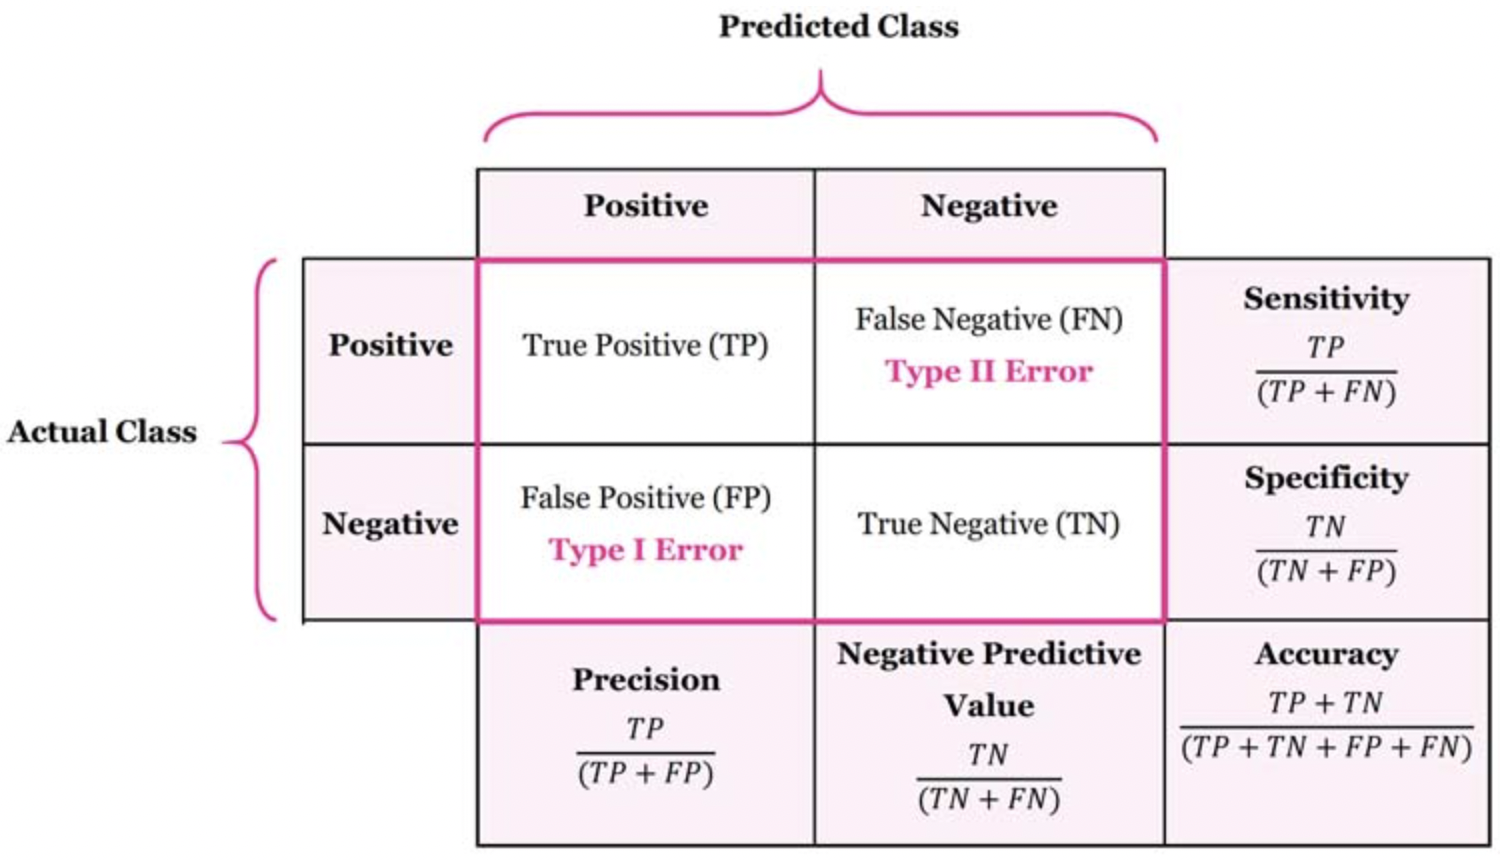
</div>

*The confusion matrix visualizes and summarizes the performance of a classification algorithm, and also allow us to compute two more metrics:*


- **Sensitivity** = true positives / (true positives + false negatives) = **correctly identified positives**
- **Specificity** = true negatives / (true negatives + false positives) = **correctly identifying negatives**
- **F1-score** = (2 / (1/recall) + (1/precision)
    - **F1-score** = 2 * ( (precision * sensitivity) / (precision + sensitivity) )
- **Accuracy** = correct predictions / total predictions

In [1073]:
conf_mx2 = confusion_matrix(Y_test, Y_pred)

#Sensitivity: correctly identified positives.
#Same as RECALL: how well the model deals with things it got wrong in each class prediction.
#How many relevant items are retrieved?
sensitivity = conf_mx2[0][0]/(conf_mx2[0][0]+conf_mx2[0][1])
print("Sensitivity: %.2f%%" % sensitivity)

#Specificity: correctly identifying negatives.
specificity = conf_mx2[1][1]/(conf_mx2[1][1]+conf_mx2[1][0])
print("Specificity: %.2f%%" % specificity)

#Precision
#How many retrieved items are relevant?
precision = conf_mx2[0][0]/(conf_mx2[0][0]+conf_mx2[1][0])
print("Precision: %.2f%%" % precision)

#Negative Predictive Value
negative_pred_value = conf_mx2[1][1]/(conf_mx2[1][1]+conf_mx2[0][1])
print("Negative Predictive Value: %.2f%%" % negative_pred_value)

#Accuracy: correct predictions / total predictions.
accuracy = (conf_mx2[0][0]+conf_mx2[1][1])/(conf_mx2[0][0]+conf_mx2[1][1]+conf_mx2[1][0]+conf_mx2[0][1])
print("Accuracy: %.2f%%" % accuracy)

#F1-Score: (2 / (1/recall) + (1/precision)
f1_score = 2/((1/sensitivity)+(1/precision))
#f1 = 2*((precision*sensitivity)/(precision+sensitivity))
print("F1-Score: %.2f%%" % f1_score)
#print("F1-Score: %.2f%%" % f1)

conf_mx2

Sensitivity: 0.99%
Specificity: 1.00%
Precision: 1.00%
Negative Predictive Value: 0.97%
Accuracy: 0.99%
F1-Score: 0.99%


array([[75,  1],
       [ 0, 34]])

In [1074]:
conf_mx = confusion_matrix(Y_test_H, Y_pred_H)

#Sensitivity: correctly identified positives.
#Same as RECALL: how well the model deals with things it got wrong in each class prediction.
#How many relevant items are retrieved?
sensitivity = conf_mx[0][0]/(conf_mx[0][0]+conf_mx[0][1])
print("Sensitivity: %.2f%%" % sensitivity)

#Specificity: correctly identifying negatives.
specificity = conf_mx[1][1]/(conf_mx[1][1]+conf_mx[1][0])
print("Specificity: %.2f%%" % specificity)

#Precision
#How many retrieved items are relevant?
precision = conf_mx[0][0]/(conf_mx[0][0]+conf_mx[1][0])
print("Precision: %.2f%%" % precision)

#Negative Predictive Value
negative_pred_value = conf_mx[1][1]/(conf_mx[1][1]+conf_mx[0][1])
print("Negative Predictive Value: %.2f%%" % negative_pred_value)

#Accuracy: correct predictions / total predictions.
accuracy = (conf_mx[0][0]+conf_mx[1][1])/(conf_mx[0][0]+conf_mx[1][1]+conf_mx[1][0]+conf_mx[0][1])
print("Accuracy: %.2f%%" % accuracy)

#F1-Score: (2 / (1/recall) + (1/precision)
f1_score = 2/((1/sensitivity)+(1/precision))
#f1 = 2*((precision*sensitivity)/(precision+sensitivity))
print("F1-Score: %.2f%%" % f1_score)
#print("F1-Score: %.2f%%" % f1)

conf_mx

Sensitivity: 0.91%
Specificity: 0.34%
Precision: 0.77%
Negative Predictive Value: 0.61%
Accuracy: 0.75%
F1-Score: 0.84%


array([[71,  7],
       [21, 11]])

## Logistic Regression ROC (Receiver Operating Characteristic) Curve.

*Makes it easy to identify the best threshold for a given method.*

*It is a nice way to see how any predictive model can distinguish between the true positives and negatives, i.e. not only correctly predict **a positive as a positive**, but also **a negative as a negative**.*

*The best points are the ones that are **furthest** from the diagonal line - up and to the left, what means the better the model is at **discriminating between positives and negatives** (more true positives and more true negatives).*

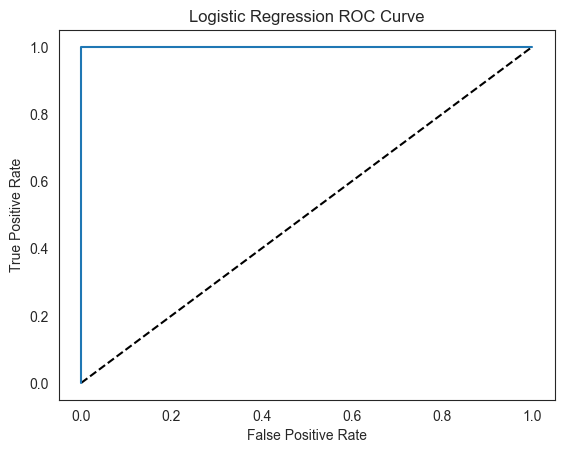

In [1075]:
y_pred_prob = logreg.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

*ROC curve training the model with **several** features.*

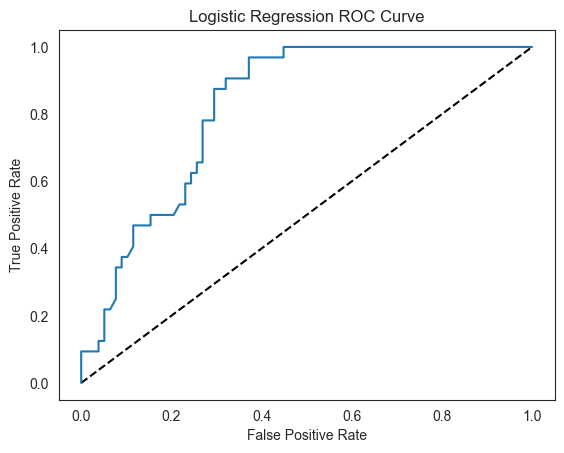

In [1076]:
y_pred_prob_h = logreg_h.predict_proba(X_test_H)[:,1] 
fpr, tpr, thresholds = roc_curve(Y_test_H, y_pred_prob_h)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

*ROC curve training the model with a **single** feature.*

### AUC (Area Under the Curve)

*A good way to get the feel for the **overall model performance**. The higher the area under the curve, the better.*

*It makes easier to compare between ROC curves, and it can help to decide which categorization method is better.*

*Be suspicious when a model is perfect: that usually means **overfitting**, or using test data in the training data.*

In [1077]:
roc_auc_score(Y_test_H, y_pred_prob_h)

0.821113782051282

In [1078]:
roc_auc_score(Y_test, y_pred_prob)

1.0

## Feature Scaling

*Doing experiments with data, I can conclude that by performing feature scaling I obtain a **100% accuracy** in each trained model with several features.*

*On the other hand, the model trained with only one feature (Humidity) manages to increase the accuracy by **5%**: from 74.54% to 79.55%.*

In [1079]:
cols2 = ['Temp','Precip', 'PrecipType',
       'Snow', 'Sunrise', 'Sunset', 'Conditions', 'Icon', 'Label',
       'Month']
df3 = df[cols2]
cols = ['Feelslike', 'Humidity', 'PrecipCover', 
       'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase']
df2 = df[cols]
scaler = StandardScaler()
scaler = MaxAbsScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2),
                   columns=['Feelslike', 'Humidity', 'PrecipCover', 
       'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase'])
df = pd.concat([df3, df2], axis=1)
cols = ['Humidity', 'Temp','Precip', 'PrecipType',
       'Snow', 'Sunrise', 'Sunset',
       'Month', 'Feelslike', 'PrecipCover', 
       'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase', 'Conditions', 'Icon', 'Label']
df = df[cols]
df

,Humidity,Temp,Precip,PrecipType,Snow,Sunrise,Sunset,Month,Feelslike,PrecipCover,...,SeaLevelPressure,CloudCover,Visibility,SolarRadiation,SolarEnergy,UVIndex,MoonPhase,Conditions,Icon,Label
0,0.844565,23.3,1.0,1.0,0.0,2021-08-01 06:34:26,2021-08-01 21:07:05,8.0,0.770492,0.5556,...,0.977530,0.628257,0.95000,0.364044,0.365031,0.8,0.80,1.0,1.0,1.0
1,0.638043,26.6,0.0,0.0,0.0,2021-08-02 06:35:30,2021-08-02 21:05:52,8.0,0.862295,0.0000,...,0.977818,0.023046,0.93125,0.796463,0.797546,0.9,0.84,0.0,0.0,0.0
2,0.468478,27.7,1.0,1.0,0.0,2021-08-03 06:36:35,2021-08-03 21:04:36,8.0,0.888525,0.0556,...,0.976186,0.025050,0.96875,0.714625,0.717791,0.9,0.89,1.0,1.0,1.0
3,0.334783,29.7,0.0,0.0,0.0,2021-08-04 06:37:40,2021-08-04 21:03:19,8.0,0.937705,0.0000,...,0.971769,0.022044,1.00000,0.739704,0.739264,0.9,0.93,0.0,0.0,0.0
4,0.318478,29.4,0.0,0.0,0.0,2021-08-05 06:38:46,2021-08-05 21:02:01,8.0,0.927869,0.0000,...,0.966968,0.036072,1.00000,0.617212,0.622699,0.9,0.96,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.298913,31.1,0.0,0.0,0.0,2022-07-28 06:29:58,2022-07-28 21:12:02,7.0,0.977049,0.0000,...,0.969368,0.001002,1.00000,0.894667,0.901840,1.0,1.00,0.0,0.0,0.0
362,0.260870,31.2,0.0,0.0,0.0,2022-07-29 06:31:01,2022-07-29 21:10:55,7.0,0.973770,0.0000,...,0.969752,0.000000,1.00000,0.897307,0.895706,1.0,0.00,0.0,0.0,0.0
363,0.230435,31.4,0.0,0.0,0.0,2022-07-30 06:32:04,2022-07-30 21:09:46,7.0,0.977049,0.0000,...,0.970520,0.001002,1.00000,0.988648,0.987730,1.0,0.01,0.0,0.0,0.0
364,0.193478,32.2,0.0,0.0,0.0,2022-07-31 06:33:07,2022-07-31 21:08:36,7.0,1.000000,0.0000,...,0.970136,0.000000,1.00000,0.849525,0.852761,0.9,0.04,0.0,0.0,0.0


In [1080]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'CloudCover', 'UVIndex', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Label
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
#df[feature_cols]
#X.Icon
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred)*100, "%")

Accuracy: 100.0 %


In [1081]:
feature_cols = ['Temp', 'Feelslike', 'Humidity', 'Precip', 'PrecipCover', 'PrecipType',
       'Snow', 'SnowDepth', 'WindSpeed', 'WindDir',
       'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation',
       'SolarEnergy', 'UVIndex', 'MoonPhase', 'Conditions', 'Icon', 'Label', 'Month']
X = df[feature_cols]
Y = df.Label
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred)*100, "%")

Accuracy: 100.0 %


*Even if you reduce the dataset fields to narrow down the reference variables to train the model, the accuracy remains stable: 100%.*

[]

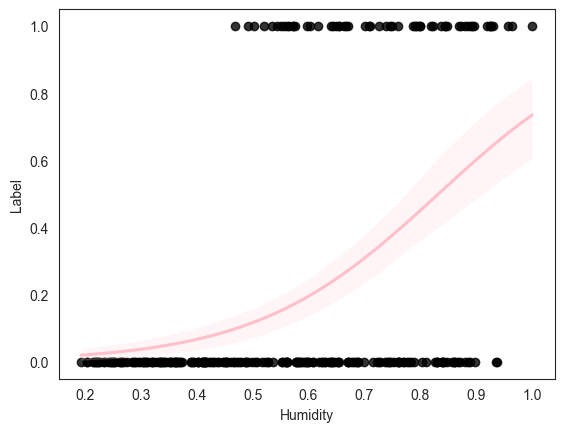

In [1082]:
sns.regplot(x=X_train.Humidity, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

[]

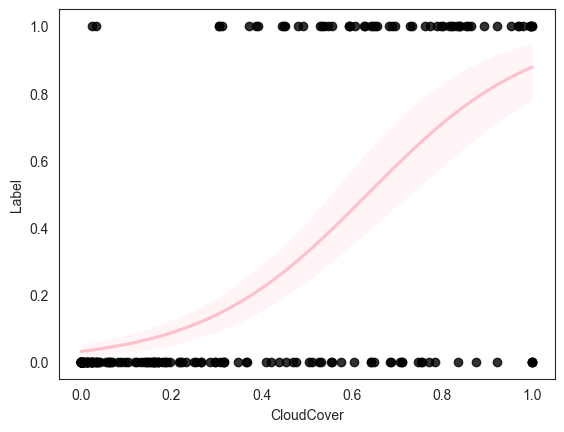

In [1083]:
sns.regplot(x=X_train.CloudCover, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

## Model Evaluation Metrics

*The **confusion matrix** shows how it predicts with 100% accuracy the true positives and negatives, without any false true/negative or error, and without variation in the application of the different evaluation metrics.*

In [1085]:
#Holdout validation
cols = ['Humidity', 'Temp', 'Precip', 'PrecipType', 'Snow','Month', 'Feelslike', 'PrecipCover', 'SnowDepth', 'WindSpeed',
       'WindDir', 'SeaLevelPressure', 'CloudCover', 'Visibility',
       'SolarRadiation', 'SolarEnergy', 'UVIndex', 'MoonPhase', 'Conditions',
       'Icon', 'Label']
X = df[cols]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=100)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
conf_mx = confusion_matrix(Y_test, Y_pred)
conf_mx

Accuracy: 100.00%


array([[83,  0],
       [ 0, 27]])

In [1086]:
#Leave One Out Cross-Validation
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(max_iter=1000)
results_loocv = model_selection.cross_val_score(model_loocv, X, Y, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 100.00%


In [1087]:
#K-folds Validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 100.00%


In [1088]:
#Repeated Random Test-Train Splits
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=900)
model_shufflecv = LogisticRegression(max_iter=1000)
results_4 = model_selection.cross_val_score(model_shufflecv, X, Y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 100.00% (0.00%)


In [1089]:
#Stratified K-fold Validation
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression(max_iter=1000)
results_skfold = model_selection.cross_val_score(model_skfold, X, Y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 100.00%


*The evaluation metric, **Repeated Random Test-Train Splits,** that allowed me to increase the accuracy of the model by at least 5% compared to the last homework in which it reached 74.54%, by scaling or normalizing the features preventing the model from getting bad conclusions when thinking that a feature could be more significant just by the values it takes.*

*This particular model is trained with only one feature because, otherwise, it always obtains an accuracy of 100% or similar.*

*The determining factor to increase its accuracy in 5% has been due to the **normalization of features**.*

In [1090]:
#Repeated Random Test-Train Splits
cols = ['Humidity']
X = df[cols]
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=900)
model_shufflecv = LogisticRegression(max_iter=1000)
results_4 = model_selection.cross_val_score(model_shufflecv, X, Y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 79.55% (1.74%)


In [1091]:
#Holdout validation
cols = ['Humidity']
X = df[cols]
X_train_hv, X_test_hv, Y_train_hv, Y_test_hv = model_selection.train_test_split(X, Y, test_size=0.30, random_state=100)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_hv, Y_train_hv)
Y_pred = model.predict(X_test_hv)
result = model.score(X_test_hv, Y_test_hv)
print("Accuracy: %.2f%%" % (result*100.0))
conf_mx = confusion_matrix(Y_test_hv, Y_pred_H)
conf_mx

Accuracy: 78.18%


array([[69, 14],
       [23,  4]])

In [1092]:
#Leave One Out Cross-Validation
cols = ['Humidity']
X = df[cols]
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(max_iter=1000)
results_loocv = model_selection.cross_val_score(model_loocv, X, Y, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 76.78%


In [1093]:
#K-folds Validation
cols = ['Humidity']
X = df[cols]
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 74.35%


In [1094]:
#Stratified K-fold Validation
cols = ['Humidity']
X = df[cols]
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression(max_iter=1000)
results_skfold = model_selection.cross_val_score(model_skfold, X, Y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 70.22%


***Are you satisfied with your model?***

*Definitely, **yes**. It has been an extensive, dense and costly work (in terms of time), but it has allowed me to deepen and learn about data processing itself, and its use in the Python language, with which I was not very familiar, and logistic regression, ROC curve and AUC among others. Despite this, I was able to accomplish the main goal of the project: to improve the model and **feature engineering**. I was able to increase its **accuracy by 5%**, not only by scaling the data but also, previously, by applying the evaluation metrics according to what the model required.*